# Introduction:

Neural networks, primarily known for their applications in classification tasks, can
also be employed for regression problems. In this exercise, we aim to
demonstrate the usage of a simple neural network in predicting a linear
relationship between input features and the output.


## Objective:

The primary objective is to predict the output value y based on two input features
x1 and x2 using a basic neural network model with the equation y=3x1+4x2. The
neural network will be trained using a feed-forward and back-propagation
mechanism to minimize the error between the predicted and actual values.

## Methodology:

### 1. Activation functions

#### Sigmoid function

- Activation functions induce non-linearity into the linear equations
- Sigmoid function takes real numbers (-infinity, infinity) and returns the output in the range of (0,1)
- It is primarily used for binary class classification
- The sigmoid function is used to convert inputs into probabilites
- The mathematical representation of sigmoid function s(x) = (1/(1+e^-x))
- The derivative of sigmoid function is s'(x) = s(x)(1-s(x))
- This makes the computations for back propogation considerably easy
- However, with sigmoid function we face difficulties with vanishing gradient
- For large input values, the derivative is very small and this diminishes the learning rate, resulting in longer training time for the models and in some cases, the model can return very poor performance
- Let us take an examaple to understand this

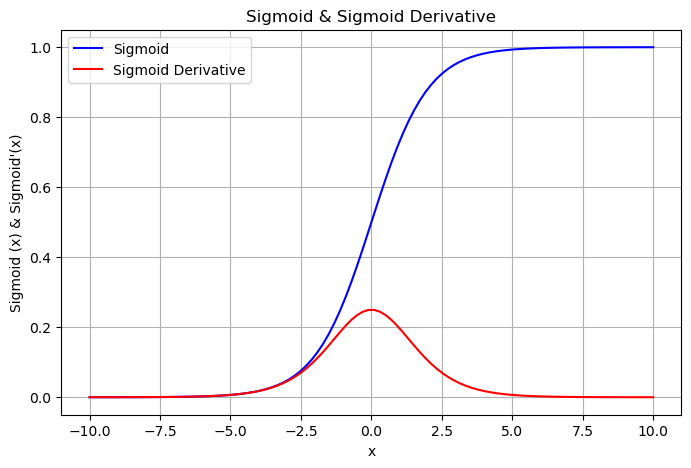

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define derivative of sigmoid
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Generate x values
x_values = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(x_values)
sigmoid_derivatives = sigmoid_derivative(x_values)

# Plot sigmoid and sigmoid derivative function
plt.figure(figsize=(8, 5))
plt.plot(x_values, sigmoid_values, label="Sigmoid", color='blue')
plt.plot(x_values, sigmoid_derivatives, label="Sigmoid Derivative", color='red')
plt.title("Sigmoid & Sigmoid Derivative")
plt.xlabel("x")
plt.ylabel("Sigmoid (x) & Sigmoid'(x)")
plt.legend()
plt.grid()
plt.show()


- From the above plot, we can observe that the gradient shrinks to nearly zero, at -5 and 5
- The maximum gradient is observed at x=0 and the magntiude of maximum gradient is 0.25
- The magnitude of gradients matter in back propogation and since for sigmoid the maximum gradient is 0.25, weight update is slower and it takes longer to converge

#### TanH function

- tanH function is represented as (e^x - e^-x)/(e^x + e^-x)
- tanH squashes the values between (-1, 1)
- The derivative of tanH is 1- tanh^2(x)

**Let us plot the tanH and it's derivatie to gain a deeer perspective**

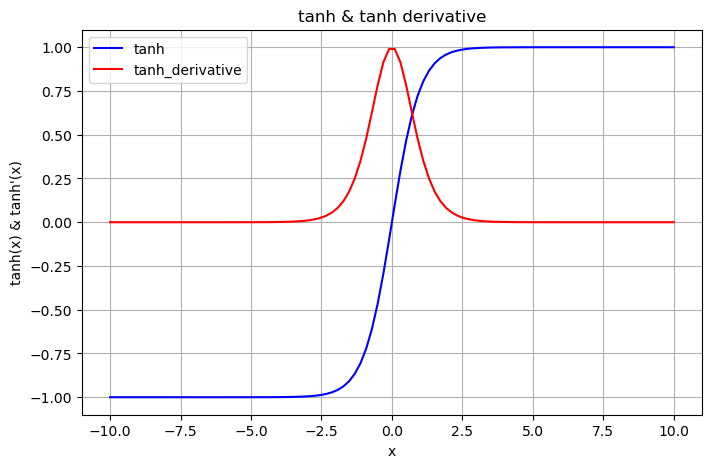

In [5]:
# Define tanh function
def tanh(x):
    return np.tanh(x)

# Define derivative of tanh
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Generate x values
x_values = np.linspace(-10, 10, 100)
tanh_values = tanh(x_values)
tanh_derivative = tanh_derivative(x_values)

# Plot tanh and tanh derivative function
plt.figure(figsize=(8, 5))
plt.plot(x_values, tanh_values, label="tanh", color='blue')
plt.plot(x_values, tanh_derivative, label="tanh_derivative", color='red')
plt.title("tanh & tanh derivative")
plt.xlabel("x")
plt.ylabel("tanh(x) & tanh'(x)")
plt.legend()
plt.grid()
plt.show()


- The maximum gradient is at x=0 and the magnitude is 1
- This is where the tanH has an advantage over sigmoid
- In tanH the weight updates are smooth and takes less epochs to converge as the magnitude of gradient is higher compared to sigmoid which has maximum gradient of 0.25
- However, tanh also faces vanishing gradient problem for large inputs
- We can observe that gradients are nearly vanishing for inputs greater than 2.5 and less than -2.5
- Another advantage of tanH over sigmoid is the range of tanh function
- It ranges from (-1, 1) i.e. mean activation is 0. This eliminates bias. Sigmoid ranges from (0,1) which has positive mean activation and may introduce bias

#### ReLU function

- ReLU stands for Rectified Linear Unit
- Relux(x) = x if x>0 and 0 if x<=0
- The derivative of Relu is 1 for x>0 and 0 for x<=0 

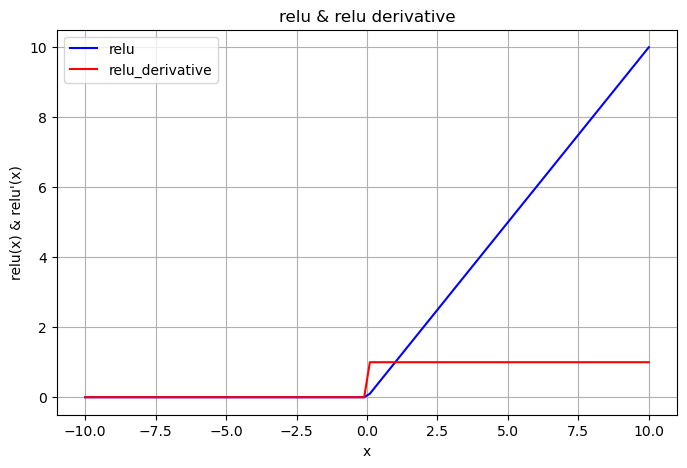

In [7]:
# Define tanh function
def relu(x):
    return np.maximum(x,0)

# Define derivative of tanh
def relu_derivative(x):
    return np.where(x>0, 1, 0)

# Generate x values
x_values = np.linspace(-10, 10, 100)
relu_values = relu(x_values)
relu_derivative = relu_derivative(x_values)

# Plot tanh and tanh derivative function
plt.figure(figsize=(8, 5))
plt.plot(x_values, relu_values, label="relu", color='blue')
plt.plot(x_values, relu_derivative, label="relu_derivative", color='red')
plt.title("relu & relu derivative")
plt.xlabel("x")
plt.ylabel("relu(x) & relu'(x)")
plt.legend()
plt.grid()
plt.show()


- From the above plot, we can see that unlike sigmoid and tanh relu is not bounded for positive inputs
- This is the biggest advantage of Relu over sigmoid and tanh
- For larger inputs, the derivative of sigmoid and tanh shrink to almost 0 while for large positive inputs, the derivative of relu is 1
- So this gets rid of the vanishing gradient problem we face in sigmoid and tanh. This helps in achieiving convergence faster
- Moreover, the computation for Relu is relatively simple. Unlike sigmoid and tanh it does not involve exponentials, resulting in efficient computation
- ReLU sets all negative inputs to 0, that means some of the neurons will be inactive. This further reduces the computation complexity

- Since Relu is linear and it is not differentiabl at x=0, it uses the concept of subgradients
- A sub-gradient is a generalized version of derivative for non-differentiable functions
- In deep learning, when we have a non-continous function, we use the sub-gradients
- In case of Relu for (x>0, derivative is 1) and for (x<=0, the derivative is 0)
- So 1 and 0 are the sub-gradients of Relu

### 2. Sample data:

**Use the following sample data for training:**

x1=3, x2=2, y_actual=17

In [1]:
x1 = 3
x2 = 2
y = 17

### 3. Feed Forward:

**Initialize the random weight w1 and w2 between 1 and 10**

**Predict the output ypred using the equation ypred = w1*x1 + w2*x2**

In [6]:
import numpy as np

# Defining the range of weights

low = 1
high = 10

w1 = round(np.random.uniform(low, high), 4)
w2 = round(np.random.uniform(low, high), 4)

print("Randomly initiazlized weight w1 is:", w1)
print("Randomly initialized weight w2 is:", w2)

Randomly initiazlized weight w1 is: 8.2496
Randomly initialized weight w2 is: 9.0336


In [7]:
ypred = w1*x1 + w2*x2

print(f"predicted value of y is: {ypred}")

predicted value of y is: 42.815999999999995


### 4. Error calculation

Compute the squared error as error = (yactual-ypred)*(yactual-ypred)

In [9]:
sqrd_error = (y-ypred)**2

print("Squared errror is:", sqrd_error)

Squared errror is: 666.4658559999998


### 5. Back Propogation

**Compute the gradients of the error with respect to the weights**

**Update the weights using the computed gradients and a learning rate**

In [66]:
gradient_w1 = 2*(ypred-y)*w1
gradient_w2 = 2*(ypred-y)*w2

print(f"Gradient wrt to w1: {gradient_w1}")
print(f"Gradient wrt to w2: {gradient_w2}")

#Learning rate

alpha = 0.01

# Updating weights

w1 = w1 - alpha*(gradient_w1)
w2 = w2 - alpha*(gradient_w2)

print(f"updated weight w1 is: {w1}")
print(f"updated weight w2 is: {w2}")

Gradient wrt to w1: 21.290806591786104
Gradient wrt to w2: 23.321918983627608
updated weight w1 is: 8.036691934082139
updated weight w2 is: 8.803380810163723


### 6. Training

**The above steps (Feed Forward to Back Propagation) are performed iteratively (20 times in this example) to refine the weights and minimize the error**

In [67]:
import numpy as np

# Inputs
x1 = 3
x2 = 2
y = 17

# Random initialization of weights
w1 =  8.2496 # As initialized earlier
w2 =  9.0336 # As initialized earlier

print("Randomly initiazlized weight w1 is:", w1)
print("Randomly initialized weight w2 is:", w2)

# Learning rate
alpha = 0.003

# Iterations
iterations = 20


def feed_forward(w1, w2):
    ypred = w1*x1 + w2*x2
    error = (ypred-y)**2
    return ypred, error

def back_propogation(w1, w2, error):
    
    dse_dw1 = 2*(ypred-y)*w1
    dse_dw2 = 2*(ypred-y)*w2

    w1 = w1 - (alpha*dse_dw1)
    w2 = w2 - (alpha*dse_dw2)

    return w1, w2

y_pred = []
list_error = []
for i in range(iterations):
    ypred, error = feed_forward(w1, w2)
    list_error.append(error)
    y_pred.append(ypred)
    print(f"Loss for iteration {i} is: {error} | ypred after iteration {i} is: {ypred}")
    w1, w2 = back_propogation(w1, w2, error)
    print(f"weights after iteration {i} are: {w1, w2}")
    print("\n")

Randomly initiazlized weight w1 is: 8.2496
Randomly initialized weight w2 is: 9.0336
Loss for iteration 0 is: 666.4658559999998 | ypred after iteration 0 is: 42.815999999999995
weights after iteration 0 are: (6.9717699583999995, 7.6343314944)


Loss for iteration 1 is: 368.0248148466883 | ypred after iteration 1 is: 36.183972864
weights after iteration 1 are: (6.169292484224023, 6.755590645059899)


Loss for iteration 2 is: 225.57212551943292 | ypred after iteration 2 is: 32.01905874279187
weights after iteration 2 are: (5.613350686891873, 6.14681496861744)


Loss for iteration 3 is: 147.22623882641727 | ypred after iteration 3 is: 29.133681997910497
weights after iteration 3 are: (5.204687013826883, 5.6993139798422385)


Loss for iteration 4 is: 100.25394103405307 | ypred after iteration 4 is: 27.012689001165125
weights after iteration 4 are: (4.8920095393197744, 5.356921229441321)


Loss for iteration 5 is: 70.38993668602933 | ypred after iteration 5 is: 25.389871076841963
weights af

### 7. Visualizatiion

**Plot the progression of errors across epochs**

**Plot the progression of ypreds across epochs**

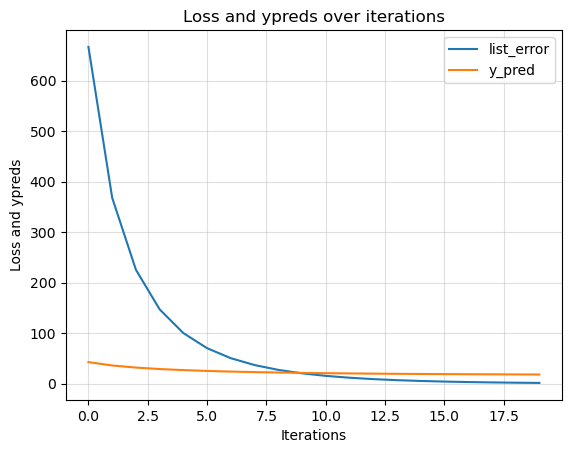

In [72]:
import matplotlib.pyplot as plt

plt.plot(list_error)
plt.plot(y_pred)
plt.xlabel("Iterations")
plt.ylabel("Loss and ypreds")
plt.title("Loss and ypreds over iterations")
plt.legend(["list_error", "y_pred"])
plt.grid(alpha=0.4)
plt.show()

**The error graph should show a declining trend, indicating that the model is learning and improving its predictions over time.**